In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
df = pd.read_csv('\\Users\\cofos\\Downloads\\train_data.csv')
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
df.head(4)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50


In [3]:
def age_gp (row):
    if row['Age']== '0-10':
        return '0-20'
    if row['Age']== '11-20':
        return '0-20'
    if row['Age']== '21-30':
        return '21-40'
    if row['Age']== '31-40':
        return '21-40'
    if row['Age']== '41-50':
        return '41-60'
    return 'Above 60'
df['Age_group'] = df.apply(lambda row:age_gp(row), axis=1)

In [4]:
df['Age_group'].value_counts()

Above 60    127185
21-40       104482
41-60        63749
0-20         23022
Name: Age_group, dtype: int64

In [5]:
def stay_gp (row):
    if row['Stay']== '0-10':
        return 'within 10 Days'
    if row['Stay']== '11-20':
        return '14-21days'
    if row['Stay']== '21-30':
        return '3weeks-month'
    return 'More than a month'
    
  #return row['A'] * row['B']

df['newcolumn'] = df.apply(lambda row:stay_gp(row), axis=1)

In [6]:
df['newcolumn'].value_counts()

More than a month    129204
3weeks-month          87491
14-21days             78139
within 10 Days        23604
Name: newcolumn, dtype: int64

In [7]:
df['Bed Grade'] = df['Bed Grade'].fillna("2")
df['City_Code_Patient']=df['City_Code_Patient'].replace(np.nan,8)

In [8]:
conditions =[(df['Available Extra Rooms in Hospital']<= 0),(df['Available Extra Rooms in Hospital']<= 10),
            (df['Available Extra Rooms in Hospital']<=20),(df['Available Extra Rooms in Hospital']>20)]
values = ['0','1-10','11-20','more than 20']
df['Number_of_extrarooms'] = np.select(conditions,values)

In [16]:
df['Number_of_visitors'].value_counts()

0-10        316047
11-20         2243
21-30          139
Above 30         9
Name: Number_of_visitors, dtype: int64

In [13]:
def visit_gp (row):
    if row['Visitors with Patient']<= 10:
        return '0-10'
    if row['Visitors with Patient']<= 20:
        return '11-20'
    if row['Visitors with Patient']<= 30:
        return '21-30'
    return 'Above 30'
df['Number_of_visitors'] = df.apply(lambda row:visit_gp(row), axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [18]:
df[['Number_of_visitors']]

,Number_of_visitors
0,0-10
1,0-10
2,0-10
3,0-10
4,0-10
...,...
318433,0-10
318434,0-10
318435,0-10
318436,0-10


In [19]:
#df['number_of_rooms']=pd.cut(df['Available Extra Rooms in Hospital'],[0,10,20,25],labels=[0-10,11-20,20-25])

In [20]:
#df['number_of_rooms'].value_counts()

In [25]:
df['Hospital_type_code'].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [22]:
df['number_of_visits']=pd.cut(df['Visitors with Patient'],[0,20,30,35],labels=[0-20,21-30,31-35])

In [131]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,newcolumn,Age_group,number_of_visits,number_of_rooms
0,1,8,c,3,Z,3,radiotherapy,R,F,2,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,within 10 Days,Above 60,-20,-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,More than a month,Above 60,-20,-10
2,3,10,e,1,X,2,anesthesia,S,E,2,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,More than a month,Above 60,-20,-10
3,4,26,b,2,Y,2,radiotherapy,R,D,2,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,More than a month,Above 60,-20,-10
4,5,26,b,2,Y,2,radiotherapy,S,D,2,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,More than a month,Above 60,-20,-10


In [24]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'Age_group', 'newcolumn',
       'Number_of_extrarooms', 'Number_of_visitors', 'number_of_visits'],
      dtype='object')

In [26]:
df1 = df.drop(['newcolumn','Stay','Admission_Deposit','Available Extra Rooms in Hospital','Age',
               'Visitors with Patient','Hospital_code','case_id','Hospital_region_code','City_Code_Hospital'],axis =1 )

In [27]:
le = LabelEncoder()
le1 = LabelEncoder()
df1['Hospital_type_code'] = le.fit_transform(df1['Hospital_type_code'])
df1['Number_of_extrarooms'] = le.fit_transform(df1['Number_of_extrarooms'])
df1['Number_of_visitors'] = le.fit_transform(df1['Number_of_visitors'])
df1['Department'] = le.fit_transform(df1['Department'])
df1['Ward_Type'] = le.fit_transform(df1['Ward_Type'])
df1['Ward_Facility_Code'] = le.fit_transform(df1['Ward_Facility_Code'])
df1['Type of Admission'] = le.fit_transform(df1['Type of Admission'])
#encoder = OrdinalEncoder(categories = [['Minor','Moderate','Extreme']])
#df1['Severity of Illness'] = encoder.fit_transform(df1['Severity of Illness'].values.reshape(-1, 1))
df1['Severity of Illness'] = le.fit_transform(df1['Severity of Illness'])
df1['Age_group'] = le.fit_transform(df1['Age_group'])
#df1['grouped'] = le.fit_transform(df1['grouped'])
#train_df['Stay'] = le1.fit_transform(train_df['Stay'])

In [28]:
df1

,Hospital_type_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Age_group,Number_of_extrarooms,Number_of_visitors,number_of_visits
0,2,3,2,5,2,31397,7.0,0,0,3,1,0,-20
1,2,3,3,5,2,31397,7.0,1,0,3,1,0,-20
2,4,1,3,4,2,31397,7.0,1,0,3,1,0,-20
3,1,3,2,3,2,31397,7.0,1,0,3,1,0,-20
4,1,3,3,3,2,31397,7.0,1,0,3,1,0,-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,0,3,1,5,4,86499,23.0,0,2,2,1,0,-20
318434,0,1,1,4,4,325,8.0,2,2,3,1,0,-20
318435,0,2,2,5,4,125235,10.0,0,1,3,1,0,-20
318436,1,1,1,3,3,91081,8.0,1,1,0,1,0,-20


In [30]:
df1 = df1.drop(['patientid','number_of_visits','City_Code_Patient'],axis=1)

In [31]:
#df2 = df[['Available Extra Rooms in Hospital','Visitors with Patient','Admission_Deposit']]

In [32]:
#X = df1.merge(df2, how='outer', left_index=True, right_index=True)

In [33]:
X  = df1

In [34]:
X.head()

,Hospital_type_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Age_group,Number_of_extrarooms,Number_of_visitors
0,2,3,2,5,2,0,0,3,1,0
1,2,3,3,5,2,1,0,3,1,0
2,4,1,3,4,2,1,0,3,1,0
3,1,3,2,3,2,1,0,3,1,0
4,1,3,3,3,2,1,0,3,1,0


In [35]:
y = df['newcolumn']

In [36]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [37]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [38]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 1818.400968
Feature 1: 50.730814
Feature 2: 2863.313410
Feature 3: 448.660957
Feature 4: 748.823071
Feature 5: 1524.156731
Feature 6: 86.845396
Feature 7: 769.828871
Feature 8: 0.000918
Feature 9: 2875.610376


In [39]:
from matplotlib import pyplot

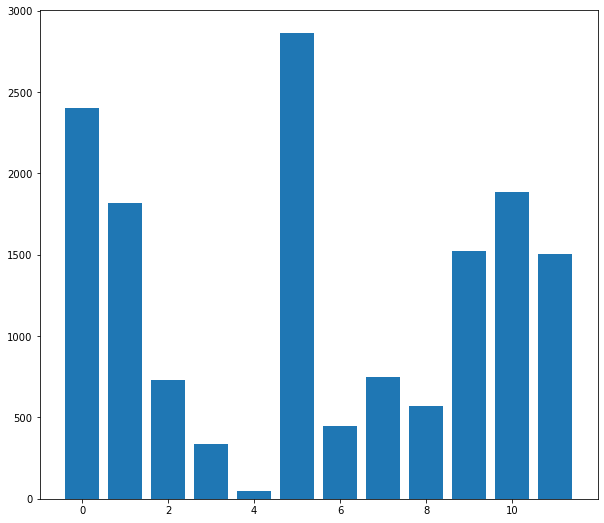

In [23]:
plt.figure(figsize=(10,9))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [40]:
X_train.head(2)

,Hospital_type_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Age_group,Number_of_extrarooms,Number_of_visitors
51095,1,2,2,5,2,1,2,2,1,0
206756,2,2,3,0,3,1,1,3,1,0


In [27]:
X_train = X_train.drop(['Hospital_region_code','Department','Ward_Facility_Code','City_Code_Patient'],axis = 1)
X_test = X_test.drop(['Hospital_region_code','Department','Ward_Facility_Code','City_Code_Patient'],axis = 1)

In [41]:
#import logistic regression modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import statsmodels.api as st
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)


In [76]:
#print(model1.summary())

In [44]:
preds = model1.predict(X_test)

In [45]:
confusion_matrix= metrics.confusion_matrix(y_test, preds)
confusion_matrix

array([[ 1380,  3558, 10716,     0],
       [ 1061,  5257, 11162,     0],
       [ 1386,  4079, 20328,     0],
       [  415,  1137,  3209,     0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

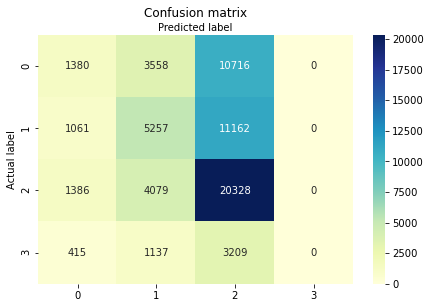

In [46]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [84]:
confmtrx = np.array(confusion_matrix(y_test, preds))

TypeError: 'numpy.ndarray' object is not callable

In [47]:
classi_report=classification_report(y_test, preds)
print(classi_report)

C:\Users\cofos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

        14-21days       0.33      0.09      0.14     15654
     3weeks-month       0.37      0.30      0.33     17480
More than a month       0.45      0.79      0.57     25793
   within 10 Days       0.00      0.00      0.00      4761

         accuracy                           0.42     63688
        macro avg       0.29      0.29      0.26     63688
     weighted avg       0.36      0.42      0.36     63688



In [86]:
Y.value_counts()

More than a month    129204
3weeks-month          87491
14-21days             78139
within 10 Days        23604
Name: newcolumn, dtype: int64

In [62]:
df2 = df.drop(['newcolumn','Stay','Admission_Deposit','Available Extra Rooms in Hospital','Age',
               'Visitors with Patient','Hospital_code','case_id','Hospital_region_code','City_Code_Hospital'],axis =1)

In [85]:
confmtrx = np.array(metrics.confusion_matrix(y_test, preds))
confmtrx

array([[ 1380,  3558, 10716,     0],
       [ 1061,  5257, 11162,     0],
       [ 1386,  4079, 20328,     0],
       [  415,  1137,  3209,     0]], dtype=int64)

In [87]:
pd.DataFrame(confmtrx, index=['More than a month','3weeks-month', '14-21days','within 10 Days'],
columns=['predicted_More than a month', 'predicted_3weeks-month','predicted_14-21days','predicted_within 10 Days'])

,predicted_More than a month,predicted_3weeks-month,predicted_14-21days,predicted_within 10 Days
More than a month,1380,3558,10716,0
3weeks-month,1061,5257,11162,0
14-21days,1386,4079,20328,0
within 10 Days,415,1137,3209,0


In [88]:
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

Accuracy Score: 0.42339216178872


In [77]:
x = pd.get_dummies(df1,drop_first=True)

In [78]:
x.head()

,Hospital_type_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age_group,Number_of_extrarooms,Number_of_visitors,Bed Grade_2.0,Bed Grade_3.0,Bed Grade_4.0,Bed Grade_2
0,2,3,2,5,0,0,3,1,0,1,0,0,0
1,2,3,3,5,1,0,3,1,0,1,0,0,0
2,4,1,3,4,1,0,3,1,0,1,0,0,0
3,1,3,2,3,1,0,3,1,0,1,0,0,0
4,1,3,3,3,1,0,3,1,0,1,0,0,0


In [79]:
Y = df['newcolumn'].

In [80]:
# split into train and test sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.20, random_state=1)

In [81]:
logit_model=st.MNLogit(Y_train,st.add_constant(x_train))
logit_model

In [82]:
result=logit_model.fit()

         Current function value: 1.216391
         Iterations: 35


C:\Users\cofos\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [83]:
stats1=result.summary()
stats2=result.summary2()
print(stats1)
print(stats2)

                          MNLogit Regression Results                          
Dep. Variable:              newcolumn   No. Observations:               254750
Model:                        MNLogit   Df Residuals:                   254708
Method:                           MLE   Df Model:                           39
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                 0.03328
Time:                        08:21:35   Log-Likelihood:            -3.0988e+05
converged:                      False   LL-Null:                   -3.2054e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
     newcolumn=3weeks-month       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2290      0.444      0.515      0.606      -0.642       1.100
Hospital_type_code              0.0373      0.004      9.287      0.000       0.

In [44]:
#inference_mod = st.MNLogit(y_train, X_train)
#mdl_fit = inference_mod.fit()

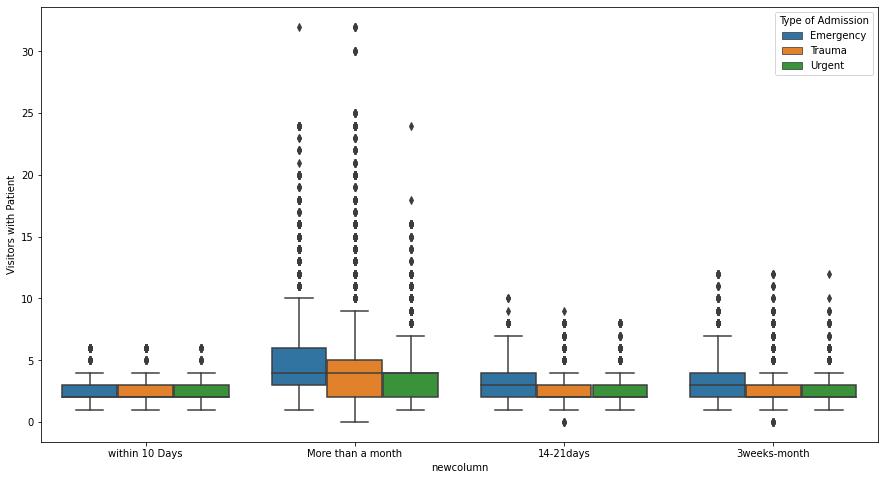

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(x = 'newcolumn', y = 'Visitors with Patient', hue = 'Type of Admission', data = df)

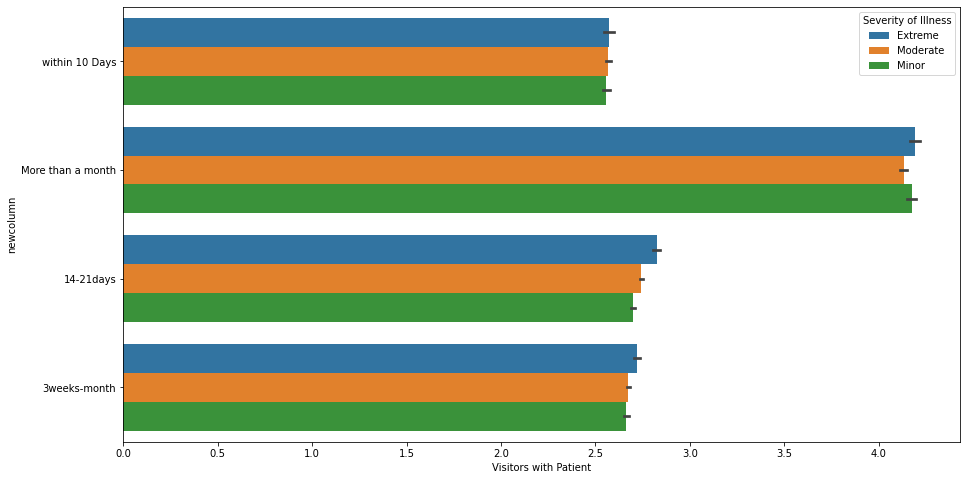

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Visitors with Patient', y = 'newcolumn', hue = 'Severity of Illness', data = df)

In [51]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'newcolumn', 'Age_group'],
      dtype='object')

In [63]:
group1 = df.groupby('Department').newcolumn.value_counts()
group1 = group1.unstack().reset_index()
group1.head()

newcolumn,Department,14-21days,3weeks-month,More than a month,within 10 Days
0,TB & Chest disease,2379,2618,3798,791
1,anesthesia,8823,8950,10357,1519
2,gynecology,59690,68383,102564,18849
3,radiotherapy,6988,7263,11886,2379
4,surgery,259,277,599,66


In [64]:
gp = pd.melt(group1, id_vars=['Department'],var_name = 'Length_stay', value_name = 'count')
gp.head()

,Department,Length_stay,count
0,TB & Chest disease,14-21days,2379
1,anesthesia,14-21days,8823
2,gynecology,14-21days,59690
3,radiotherapy,14-21days,6988
4,surgery,14-21days,259


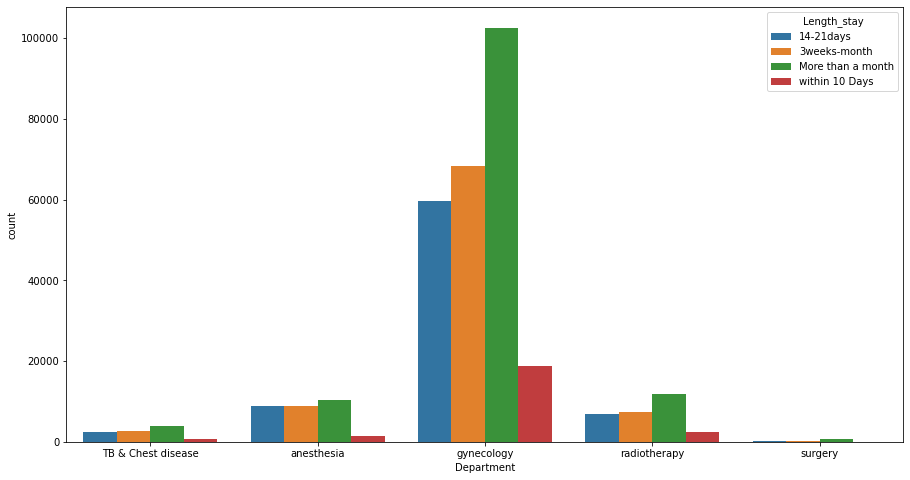

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Department', y = 'count', hue = 'Length_stay', data = gp)

In [77]:
group = df.groupby('Type of Admission').newcolumn.value_counts()
group =  group.unstack().reset_index()
group.head()

newcolumn,Type of Admission,14-21days,3weeks-month,More than a month,within 10 Days
0,Emergency,31559,27399,44500,14218
1,Trauma,33745,46244,66944,5328
2,Urgent,12835,13848,17760,4058


In [78]:
p = pd.melt(group1, id_vars=['Type of Admission'],var_name = 'Length_stay', value_name = 'count')
p.head()

,Type of Admission,Length_stay,count
0,Emergency,14-21days,31559
1,Trauma,14-21days,33745
2,Urgent,14-21days,12835
3,Emergency,3weeks-month,27399
4,Trauma,3weeks-month,46244


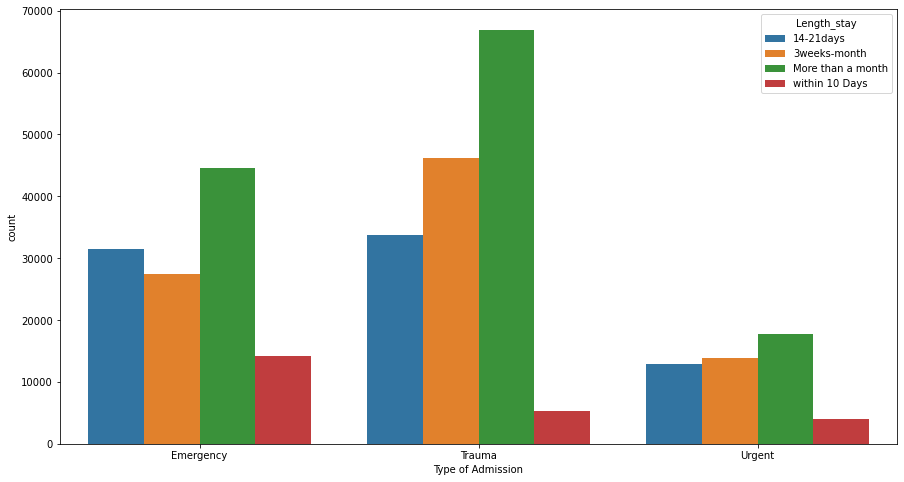

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Type of Admission', y = 'count', hue = 'Length_stay', data = p)

In [88]:
leng = df['Stay'].value_counts().rename_axis('Stay').reset_index(name='counts')
leng

,Stay,counts
0,21-30,87491
1,11-20,78139
2,31-40,55159
3,51-60,35018
4,0-10,23604
5,41-50,11743
6,71-80,10254
7,More than 100 Days,6683
8,81-90,4838
9,91-100,2765


In [98]:
b = pd.DataFrame({'Percentage': df.groupby(( 'Stay')).size() / len(df)})*100
b = b.reset_index()

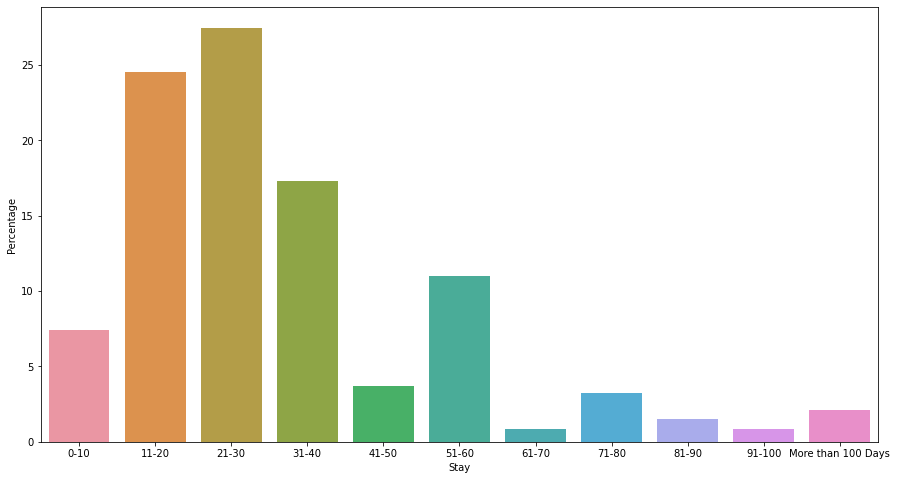

In [111]:
plt.figure(figsize=(15,8))
sns.barplot(x ='Stay', y = 'Percentage', data = b)

In [114]:
c = pd.DataFrame({'Percentage': df.groupby(( 'newcolumn')).size() / len(df)})*100
c = c.reset_index()
c

,newcolumn,Percentage
0,14-21days,24.538215
1,3weeks-month,27.475050
2,More than a month,40.574303
3,within 10 Days,7.412432


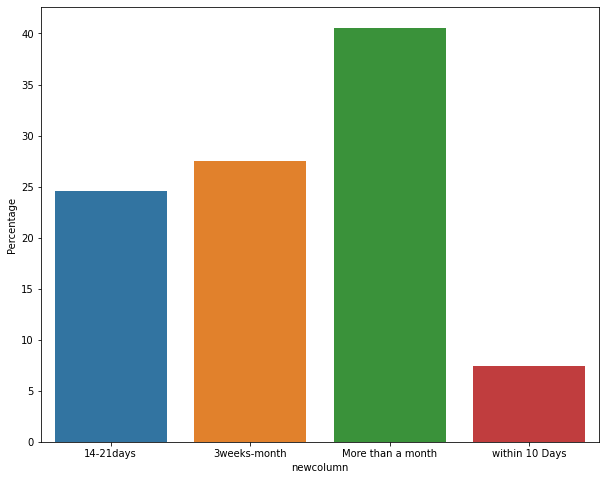

In [116]:
plt.figure(figsize=(10,8))
sns.barplot(x ='newcolumn', y = 'Percentage', data = c)